In [29]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("./tools/")
sys.path.append("./final_project/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] # (Units = USD) 

features = ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']

# financial_features = ['poi', 'salary', 'total_payments', 'bonus', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock']
#'email_address',
email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] # units = number of emails messages; except ‘email_address’, which is a text string
# email_features = ['poi', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']


In [24]:
### Load the dictionary containing the dataset
with open("final_project/final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

data_dict.pop('TOTAL')

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

['CHAN RONNIE', 'WODRASKA JOHN', 'URQUHART JOHN A', 'HAUG DAVID L', 'MENDELSOHN JOHN', 'CLINE KENNETH W', 'HAYES ROBERT E', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'PIRO JIM', 'MEYER JEROME J', 'LOCKHART EUGENE E', 'PEREIRA PAULO V. FERRAZ', 'BLAKE JR. NORMAN P', 'THE TRAVEL AGENCY IN THE PARK', 'WINOKUR JR. HERBERT S', 'BROWN MICHAEL', 'HAYSLETT RODERICK J', 'SAVAGE FRANK', 'GRAMM WENDY L']


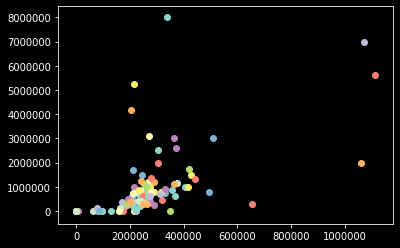

In [37]:
### Task 2: Remove outliers
import matplotlib.pyplot as plt
data_wo_outliers = {}
for name, features in data_dict.items():
    salary = 0 if features['salary'] == 'NaN' else features['salary']
    bonus = 0 if features['bonus'] == 'NaN' else features['bonus']
    exed_stock_options = 0 if features['exercised_stock_options'] == 'NaN' else features['exercised_stock_options']
    if salary == 0 and bonus == 0 and exed_stock_options == 0:
        outliers.append(name)
    else:
        data_wo_outliers[name] = features
        plt.scatter(salary, bonus)
    # plt.annotate(name, (salary, bonus))
print(outliers)
plt.show()
